# 1. Introduction: Analysis of Nobel Prize Winner's Data 

Nobel Prize is considered the one of the most prestigious prize a person can get. It is basically five separate prizes that, according to Alfred Nobel's will of 1895, are awarded to "those who, during the preceding year, have conferred the greatest benefit to humankind". The five in which Nobel Prize is given are  Chemistry, Economic Sciences , Literature , Peace , Physics and Physiology & Medicine. 

Here in this Project we will be using various Python libraries to do data analysis of the Nobel Prize Winners from 1901 to 2020.

# 2. Importing Libraries and Data 
In this section we will be importing important libraries and data . Along with this we will have initial check of the data.

In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option("display.max_columns",200)

In [2]:
df=pd.read_csv("D:/jupyter_workspace/Nobel_Prize_DataAnalysis/complete2.csv")

In [3]:
df.head()

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,categoryTopMotivation,award_link,id,name,knownName,givenName,familyName,fullName,penName,gender,laureate_link,birth_date,birth_city,birth_cityNow,birth_continent,birth_country,birth_countryNow,birth_locationString,death_date,death_city,death_cityNow,death_continent,death_country,death_countryNow,death_locationString,orgName,nativeName,acronym,org_founded_date,org_founded_city,org_founded_cityNow,org_founded_continent,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,3,10000000,12295082,10-10-01,received,for their analyses of markets with asymmetric ...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,745,A. Michael Spence,A. Michael Spence,A. Michael,Spence,A. Michael Spence,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1943-07-11,"Montclair, NJ","Montclair, NJ",North America,USA,USA,"Montclair, NJ, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,3,630000,3404179,17-10-75,received,for the discovery of the connection between co...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,102,Aage N. Bohr,Aage N. Bohr,Aage N.,Bohr,Aage Niels Bohr,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1922-06-19,Copenhagen,Copenhagen,Europe,Denmark,Denmark,"Copenhagen, Denmark",08-09-09,Copenhagen,Copenhagen,Europe,Denmark,Denmark,"Copenhagen, Denmark",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,3,10000000,11762861,06-10-04,received,for the discovery of ubiquitin-mediated protei...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,779,Aaron Ciechanover,Aaron Ciechanover,Aaron,Ciechanover,Aaron Ciechanover,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1947-10-01,Haifa,Haifa,Asia,British Protectorate of Palestine,Israel,"Haifa, British Protectorate of Palestine (now ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,18-10-82,received,for his development of crystallographic electr...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,259,Aaron Klug,Aaron Klug,Aaron,Klug,Aaron Klug,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1926-08-11,Zelvas,Zelvas,Europe,Lithuania,Lithuania,"Zelvas, Lithuania",20-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,3,800000,2988048,15-10-79,received,for their contributions to the theory of the u...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,114,Abdus Salam,Abdus Salam,Abdus,Salam,Abdus Salam,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1926-01-29,Jhang Maghiāna,Jhang Maghiāna,Asia,India,Pakistan,"Jhang Maghiāna, India (now Pakistan)",21-11-96,Oxford,Oxford,Europe,United Kingdom,United Kingdom,"Oxford, United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


In [4]:
df.shape

(950, 52)

# 3. Data Preparation 
Here we will perform certain steps to prepare data adequate for better analysis of it.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    int64 
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

In [6]:
# Dropping unneccessary columns. 

df.drop(columns=['categoryFullName','sortOrder','prizeStatus','motivation',
                 'categoryTopMotivation','award_link','knownName','givenName',
                 'familyName','fullName','penName','laureate_link','birth_cityNow',
                 'birth_countryNow','orgName','birth_locationString','death_city','death_cityNow',
                 'death_continent','death_country','death_countryNow','death_locationString','nativeName',
                 'acronym','org_founded_cityNow','org_founded_countryNow','org_founded_locationString',
                 'residence_1','residence_2','affiliation_1','affiliation_2','affiliation_3','affiliation_4',
                 'birth_city','org_founded_city'],inplace=True)

In [7]:
# shape after dropping the columns 
df.shape

(950, 17)

We can see that for organizations gender coulmns has nan value which we will replace with value "organization".

In [8]:
# Replacing the gender values for organistaions with NaN values.
df['gender']=df['gender'].replace(np.nan,'organization')

In [9]:
# Checking the number of nan values
df.gender.isna().sum()

0

Same problem with birth_date column of organization category so replacing with org_founded_date.

In [10]:
# Here we use fillna() to transfer the value so that column to be filled with some legal values.
df.birth_date.fillna(df.org_founded_date, inplace=True)
del df['org_founded_date']     # deleting the org_founded_date

In [11]:
df['birth_date'].isna().sum()

1

In [12]:
df[df['birth_date'].isna()]

,awardYear,category,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,id,name,gender,birth_date,birth_continent,birth_country,death_date,org_founded_continent,org_founded_country,ind_or_org
617,2015,Peace,1,8000000,8384572,09-10-15,925,National Dialogue Quartet,organization,NaN,NaN,NaN,NaN,NaN,NaN,Organization


In [13]:
# To replace the value we can use repalce() method
# Here you can give that NaN a value so that it would not later become a problem in data analysis
df['birth_date']=df['birth_date'].replace(np.nan,'not specified')


The thing that we done above can also be done on the cell below for replacing the values not adequate for analysis.

In [14]:
df.birth_continent.fillna(df.org_founded_continent, inplace=True)
del df['org_founded_continent'] 

In [15]:
df['birth_continent']=df['birth_continent'].replace(np.nan,'not specified')

In [16]:
df.birth_country.fillna(df.org_founded_country, inplace=True)
del df['org_founded_country']

In [17]:
df['birth_country']=df['birth_country'].replace(np.nan,'not specified')

In [18]:
df['death_date']=df['death_date'].replace(np.nan,'not dead or organization')


In [19]:
df=df.rename(columns={"awardYear":"award_year", "portion":"share", "prizeAmount":"prize_amount", 
                      "prizeAmountAdjusted":"prize_amount_adjusted", 
                      "dateAwarded":"date_awarded","id":"laureate_id", "ind_or_org":"type"});


In [20]:
df['date_awarded']=df['date_awarded'].replace(np.nan,'not specified')


In [21]:
df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,3,10000000,12295082,10-10-01,745,A. Michael Spence,male,1943-07-11,North America,USA,not dead or organization,Individual
1,1975,Physics,3,630000,3404179,17-10-75,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,08-09-09,Individual
2,2004,Chemistry,3,10000000,11762861,06-10-04,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,18-10-82,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,20-11-18,Individual
4,1979,Physics,3,800000,2988048,15-10-79,114,Abdus Salam,male,1926-01-29,Asia,India,21-11-96,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,3,480000,3345725,not specified,66,John Bardeen,male,1908-05-23,North America,USA,30-01-91,Individual
946,1954,Chemistry,1,181647,2640218,not specified,217,Linus Pauling,male,1901-02-28,North America,USA,19-08-94,Individual
947,1911,Chemistry,1,140695,7327865,not specified,6,Marie Curie,female,1867-11-07,Europe,Russian Empire,04-07-34,Individual
948,1981,Peace,1,1000000,2929688,14-10-81,515,Office of the United Nations High Commissioner...,organization,1951-00-00,Europe,Switzerland,not dead or organization,Organization


Now checking the data whether it has null values or not.

In [22]:
df.isnull().sum()

award_year               0
category                 0
share                    0
prize_amount             0
prize_amount_adjusted    0
date_awarded             0
laureate_id              0
name                     0
gender                   0
birth_date               0
birth_continent          0
birth_country            0
death_date               0
type                     0
dtype: int64

Now adding the data of laureates for 2020 which was missing in our dataset.

In [23]:
df2= pd.DataFrame({"award_year":[2020,2020,2020,2020,2020,2020,2020,2020,2020,2020],
"category":['Physiology or Medicine','Physiology or Medicine','Physiology or Medicine','Physics','Physics','Physics','Chemistry','Chemistry','Literature','Peace'],
"share":['1/3','1/3','1/3','1/2','1/4','1/4','1/2','1/2','1','1'],
"prize_amount":['not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified'],
"prize_amount_adjusted":['not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified'],
"date_awarded":['2020-10-05','2020-10-05','2020-10-05','2020-10-06','2020-10-06','2020-10-06','2020-10-07','2020-10-07','2020-10-08','2020-10-09'],
"laureate_id":['not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified','not specified'],
"name":['Michael Houghton','Harvey J. Alter','Charls M. Rice','Roger Penrose','Reinhard Genzel','Andrea M. Ghez','Jennifer Doudna','Emmanuelle Charpentier','Louise Glück','World Food Programme'],
"gender":['male','male','male','male','male','female','female','female','female','organization'],
"birth_date":['1949-01-01','1935-09-12','1952-08-25','1931-08-08','1952-03-24','1965-06-16','1964-02-19','1968-12-11','1943-04-22','1961-12-19'],
"birth_continent":['Europe','North America','North America','Europe','Europe','Europe','North America','Europe','North America','North America'],"birth_country":['United Kingdom','USA','USA','United Kingdom','Germany','USA','USA','France','USA','USA'],
"death_date":['not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization','not dead or organization'],
"type":['Individual','Individual','Individual','Individual','Individual','Individual','Individual','Individual','Individual','Organization']})


In [24]:
df=df.append(df2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21168\799868226.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


In [25]:
df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,3,10000000,12295082,10-10-01,745,A. Michael Spence,male,1943-07-11,North America,USA,not dead or organization,Individual
1,1975,Physics,3,630000,3404179,17-10-75,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,08-09-09,Individual
2,2004,Chemistry,3,10000000,11762861,06-10-04,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,18-10-82,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,20-11-18,Individual
4,1979,Physics,3,800000,2988048,15-10-79,114,Abdus Salam,male,1926-01-29,Asia,India,21-11-96,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,Physics,1/4,not specified,not specified,2020-10-06,not specified,Andrea M. Ghez,female,1965-06-16,Europe,USA,not dead or organization,Individual
6,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Jennifer Doudna,female,1964-02-19,North America,USA,not dead or organization,Individual
7,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Emmanuelle Charpentier,female,1968-12-11,Europe,France,not dead or organization,Individual
8,2020,Literature,1,not specified,not specified,2020-10-08,not specified,Louise Glück,female,1943-04-22,North America,USA,not dead or organization,Individual


In [26]:
# saved the refined dataset 
df.to_csv('nobel_prize_data.csv', index=None)

# 4. Exploratory Data Analysis and Visualization.
Here we will do some important EDA and visualization for getting significant insights.

In [27]:
df

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,3,10000000,12295082,10-10-01,745,A. Michael Spence,male,1943-07-11,North America,USA,not dead or organization,Individual
1,1975,Physics,3,630000,3404179,17-10-75,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,08-09-09,Individual
2,2004,Chemistry,3,10000000,11762861,06-10-04,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,18-10-82,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,20-11-18,Individual
4,1979,Physics,3,800000,2988048,15-10-79,114,Abdus Salam,male,1926-01-29,Asia,India,21-11-96,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,Physics,1/4,not specified,not specified,2020-10-06,not specified,Andrea M. Ghez,female,1965-06-16,Europe,USA,not dead or organization,Individual
6,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Jennifer Doudna,female,1964-02-19,North America,USA,not dead or organization,Individual
7,2020,Chemistry,1/2,not specified,not specified,2020-10-07,not specified,Emmanuelle Charpentier,female,1968-12-11,Europe,France,not dead or organization,Individual
8,2020,Literature,1,not specified,not specified,2020-10-08,not specified,Louise Glück,female,1943-04-22,North America,USA,not dead or organization,Individual


## i) Nobel Laureates for all years. 

We will be making dataframes for better plotting with seaborn library.

In [28]:
yeardf = df.groupby('award_year')[['laureate_id']].count()



In [29]:
yeardf

,laureate_id
award_year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


In [30]:
#resetting index 
yeardf = yeardf.sort_values('laureate_id', ascending=False).reset_index()

In [31]:
yeardf

,award_year,laureate_id
0,2001,15
1,2019,14
2,2002,13
3,2013,13
4,2005,13
...,...,...
112,1915,4
113,1924,3
114,1914,3
115,1918,2


In [32]:
# Renaming the columns for better view and understanding 
yeardf.rename(columns = { 'award_year':'year','laureate_id':'number_of_laureate'}, inplace = True)

In [33]:
yeardf

,year,number_of_laureate
0,2001,15
1,2019,14
2,2002,13
3,2013,13
4,2005,13
...,...,...
112,1915,4
113,1924,3
114,1914,3
115,1918,2


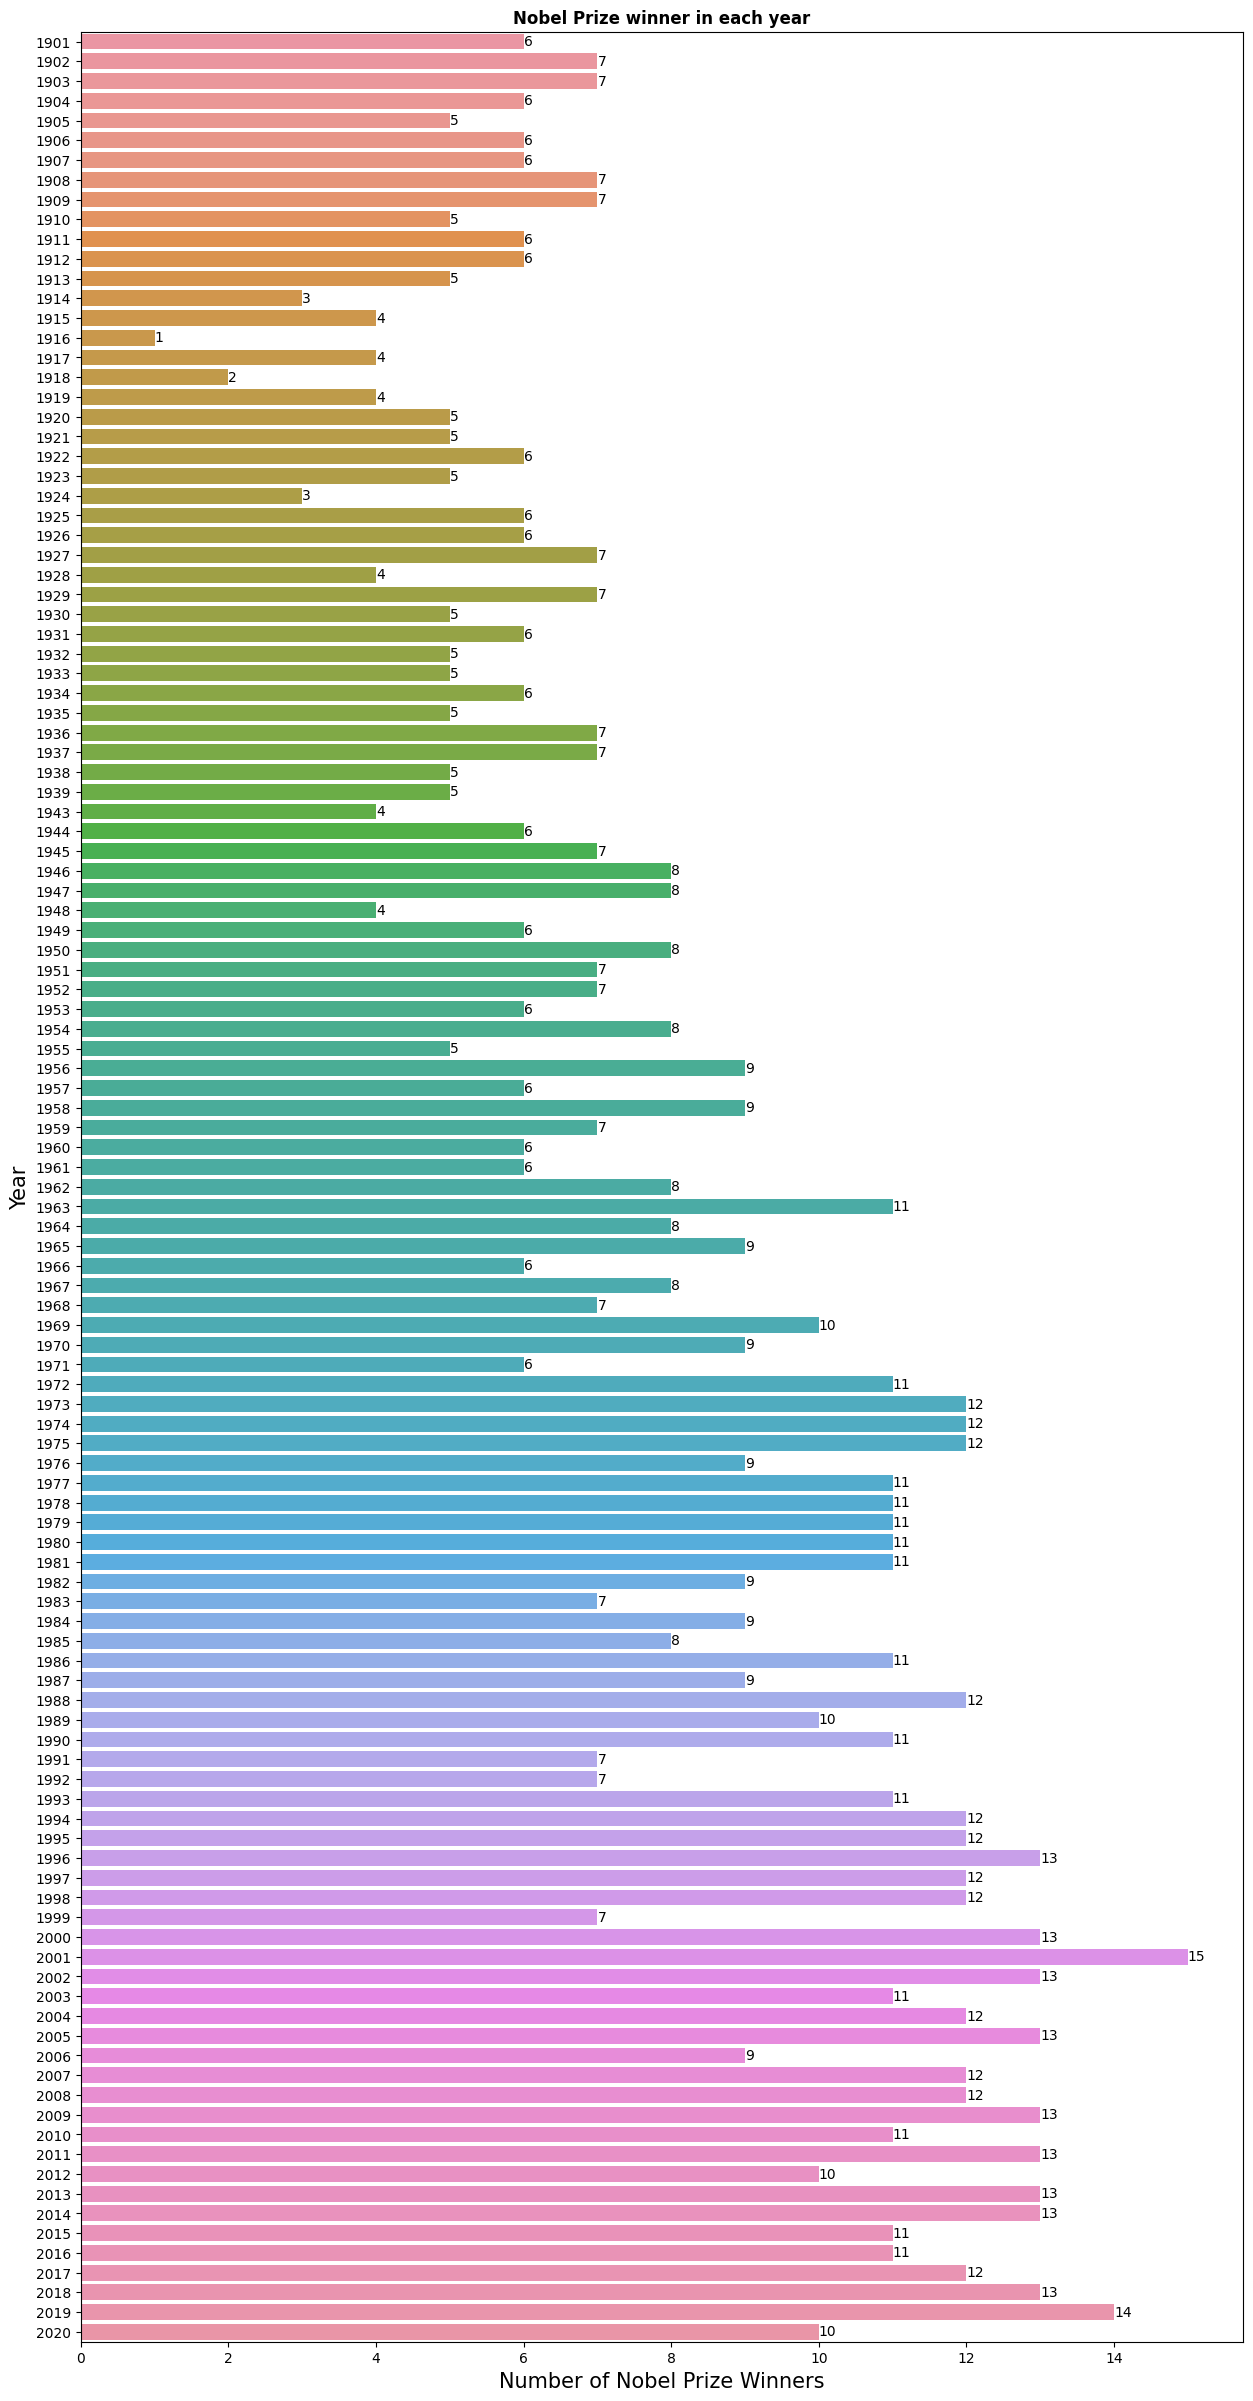

In [34]:
# Plotting the Nobel Laureates for each year from 1901 to 2020.

plt.figure(figsize=(15,30))
plt.title('Nobel Prize winner in each year',fontweight=800)
ax=sns.barplot(x='number_of_laureate', y='year', orient='h', data=yeardf);
plt.ylabel('Year', size=15)
plt.xlabel('Number of Nobel Prize Winners', size=15)
for bars in ax.containers:        # function for datalabels.
    ax.bar_label(bars)

We can see that 2001 was the year in which highest number i.e. 15 of the Laureates were awarded Nobel.

## ii) Nobel Laureates per Different Categories.

In [35]:
categorydf = df.groupby('category')[['laureate_id']].count()

In [36]:
categorydf = categorydf.sort_values('laureate_id', ascending=False).reset_index()

In [37]:
categorydf.rename(columns = { 'laureate_id': 'number_of_laureate'}, inplace = True)

In [38]:
categorydf

,category,number_of_laureate
0,Physiology or Medicine,222
1,Physics,216
2,Chemistry,186
3,Peace,135
4,Literature,117
5,Economic Sciences,84


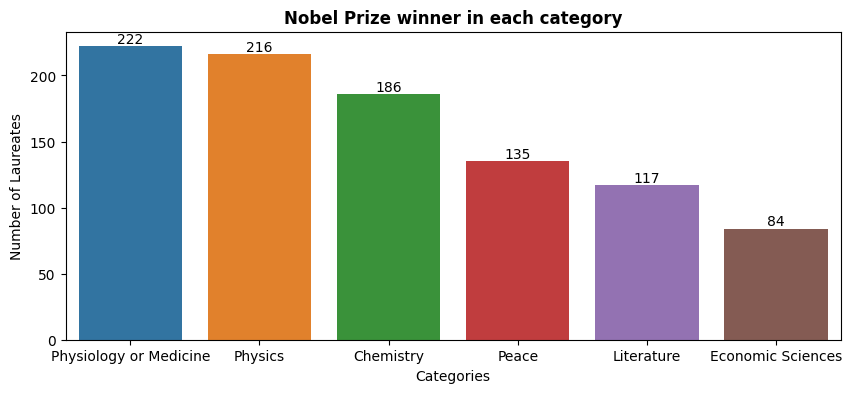

In [39]:
# Plotting the NobelPrize Winners in each category. 

plt.figure(figsize=(10,4))
plt.title('Nobel Prize winner in each category',fontweight=800)
ax=sns.barplot(x='category', y='number_of_laureate', orient='v', data=categorydf);
plt.ylabel('Number of Laureates', size=10)
plt.xlabel('Categories', size=10)

for bars in ax.containers: # for datalables.
    ax.bar_label(bars)

Over these years highest number of Nobel were awarded in Medicine field followed by Physics and lowest numbers are in Economic Sciences.  

## iii) Nobel Laureates according to birth countries.

In [40]:
countrydf = df.groupby('birth_country')[['laureate_id']].count()

In [41]:
countrydf = countrydf.sort_values('laureate_id', ascending=False).reset_index()

In [42]:
countrydf.rename(columns = { 'birth_country':'country' , 'laureate_id': 'number_of_laureate'}, inplace = True)

In [43]:
countrydf

,country,number_of_laureate
0,USA,287
1,United Kingdom,91
2,Germany,78
3,France,56
4,Sweden,29
...,...,...
92,Madagascar,1
93,Mecklenburg,1
94,Morocco,1
95,Nigeria,1


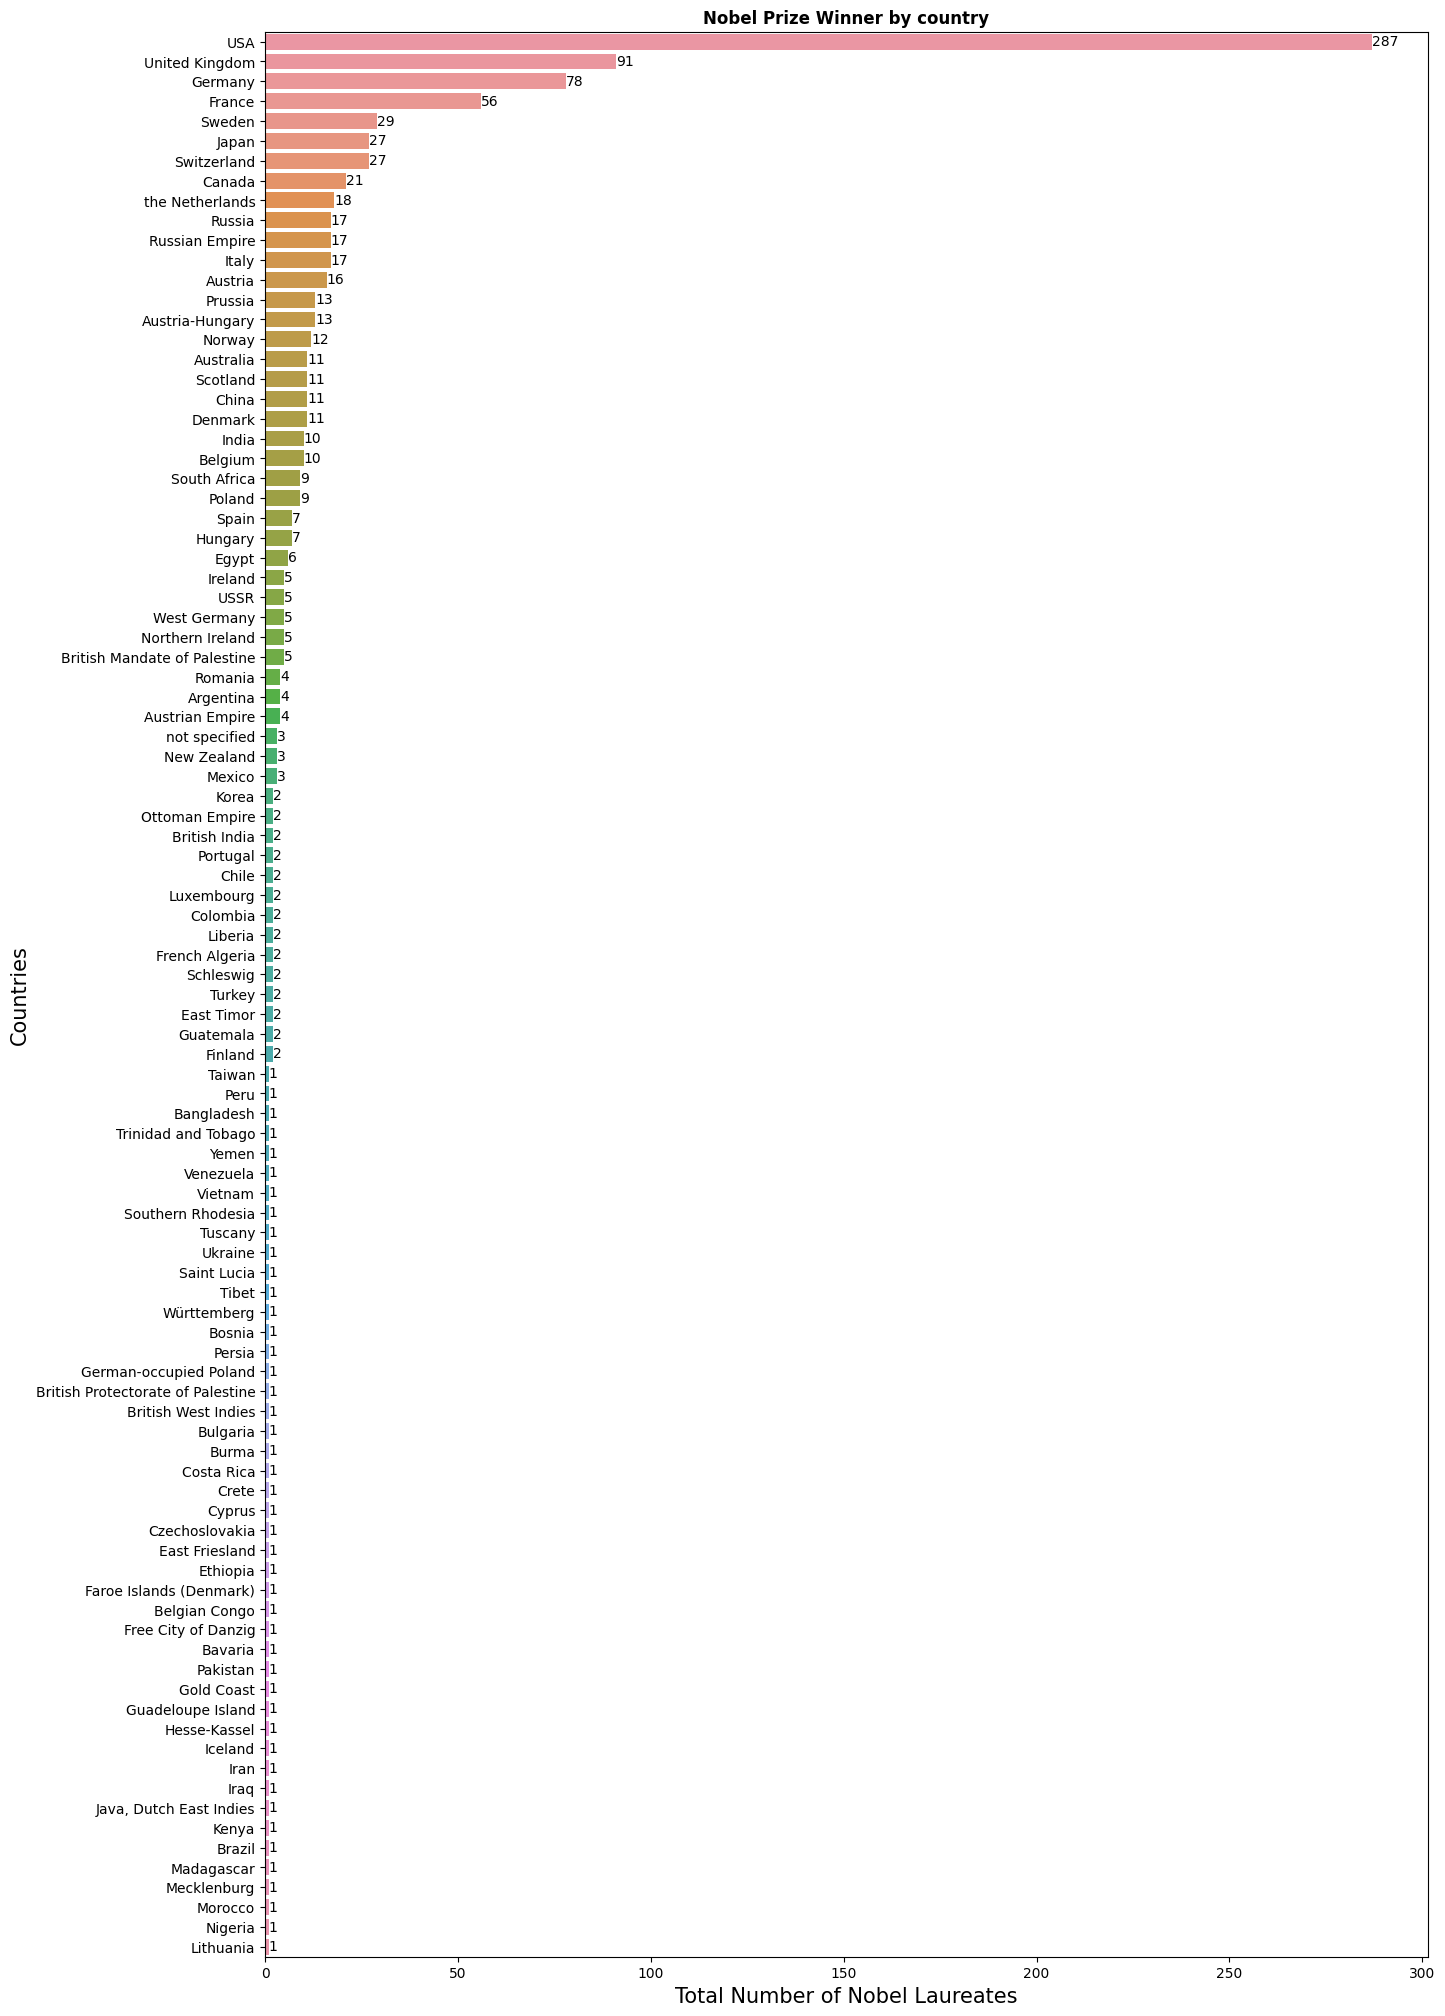

In [44]:
# Plotting the NobelPrize Winners and their birth countries. 

plt.figure(figsize=(15,25))
plt.title('Nobel Prize Winner by country', fontweight=800)
ax=sns.barplot(y='country', x='number_of_laureate', orient='h', data=countrydf)
plt.ylabel('Countries', size=15)
plt.xlabel('Total Number of Nobel Laureates', size=15);
for bars in ax.containers:
    ax.bar_label(bars)

USA lead this list with 287 laureates born here.

## iv) Nobel Laureates according to birth continents.

In [45]:
continentdf = df.groupby('birth_continent')[['laureate_id']].count()

In [46]:
continentdf = continentdf.sort_values('laureate_id', ascending=False).reset_index()

In [47]:
continentdf.rename(columns = { 'birth_continent':'continent' , 'laureate_id': 'number_of_laureate'}, inplace = True)

In [48]:
continentdf

,continent,number_of_laureate
0,Europe,513
1,North America,317
2,Asia,73
3,Africa,27
4,Oceania,16
5,South America,11
6,not specified,3


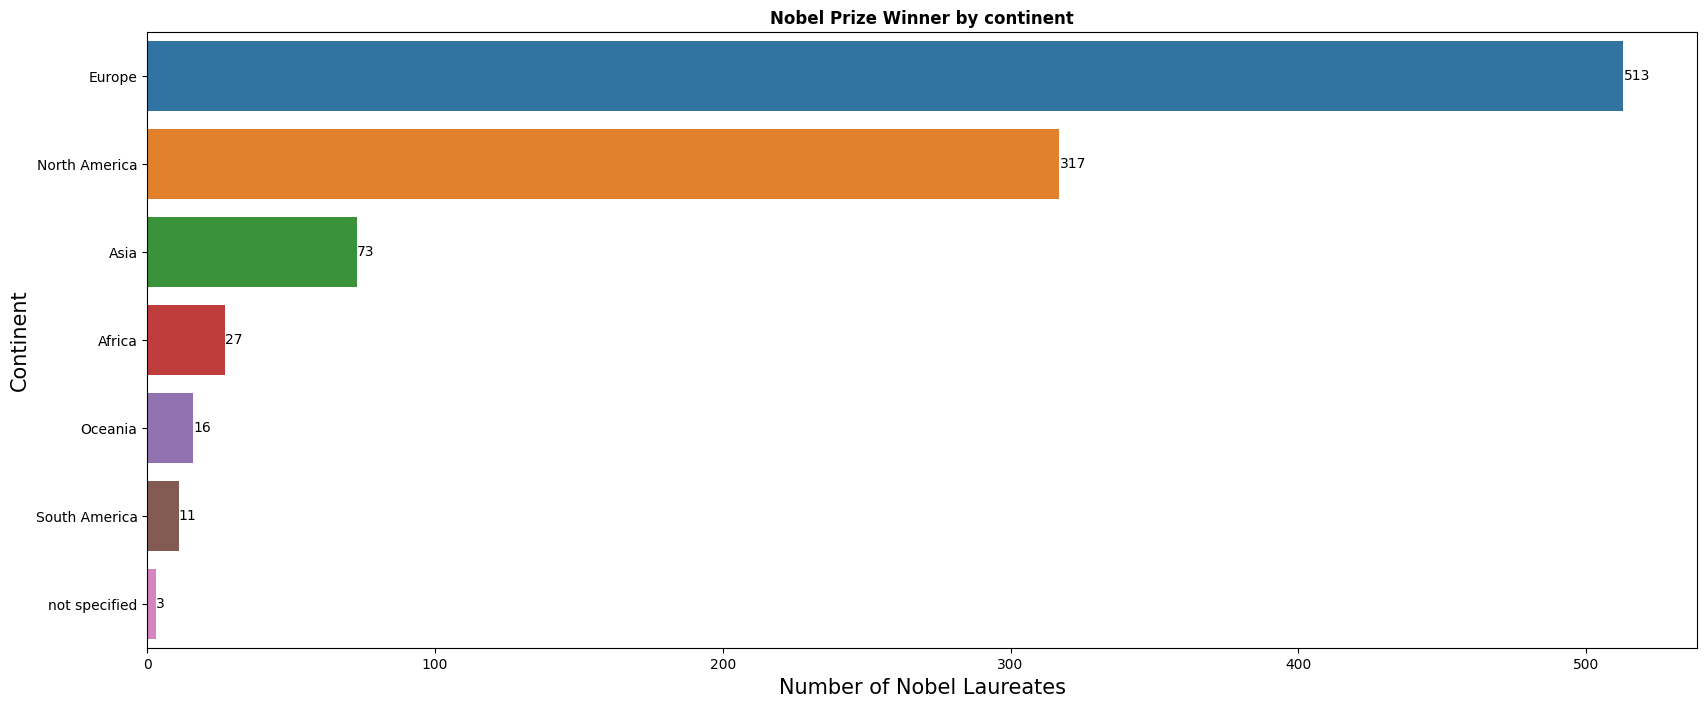

In [49]:
plt.figure(figsize=(20,8))
plt.title('Nobel Prize Winner by continent', fontweight=800)
ax=sns.barplot(y='continent', x='number_of_laureate', orient='h', data=continentdf)
plt.ylabel('Continent', size=15)
plt.xlabel('Number of Nobel Laureates', size=15)
for bars in ax.containers:
    ax.bar_label(bars)


Europe leads this list with most number of laureates i.e. 513

# 5. Asking Questions.
Here in this step we will bea asking some important question to get more information from data.

## Question1. What are the numbers male and female laureates in each category?

In [50]:
dfgender=df.groupby("category")[['gender']].value_counts()
dfgender=dfgender.reset_index()

In [51]:
dfgender.rename(columns={0:'number_of_laureate'} , inplace=True)

In [52]:
dfgender

,category,gender,number_of_laureate
0,Chemistry,male,179
1,Chemistry,female,7
2,Economic Sciences,male,82
3,Economic Sciences,female,2
4,Literature,male,101
5,Literature,female,16
6,Peace,male,90
7,Peace,organization,28
8,Peace,female,17
9,Physics,male,212


In [53]:
dfgender.pivot(index='category',columns='gender', values='number_of_laureate')

gender,female,male,organization
category,,,
Chemistry,7.0,179.0,NaN
Economic Sciences,2.0,82.0,NaN
Literature,16.0,101.0,NaN
Peace,17.0,90.0,28.0
Physics,4.0,212.0,NaN
Physiology or Medicine,12.0,210.0,NaN


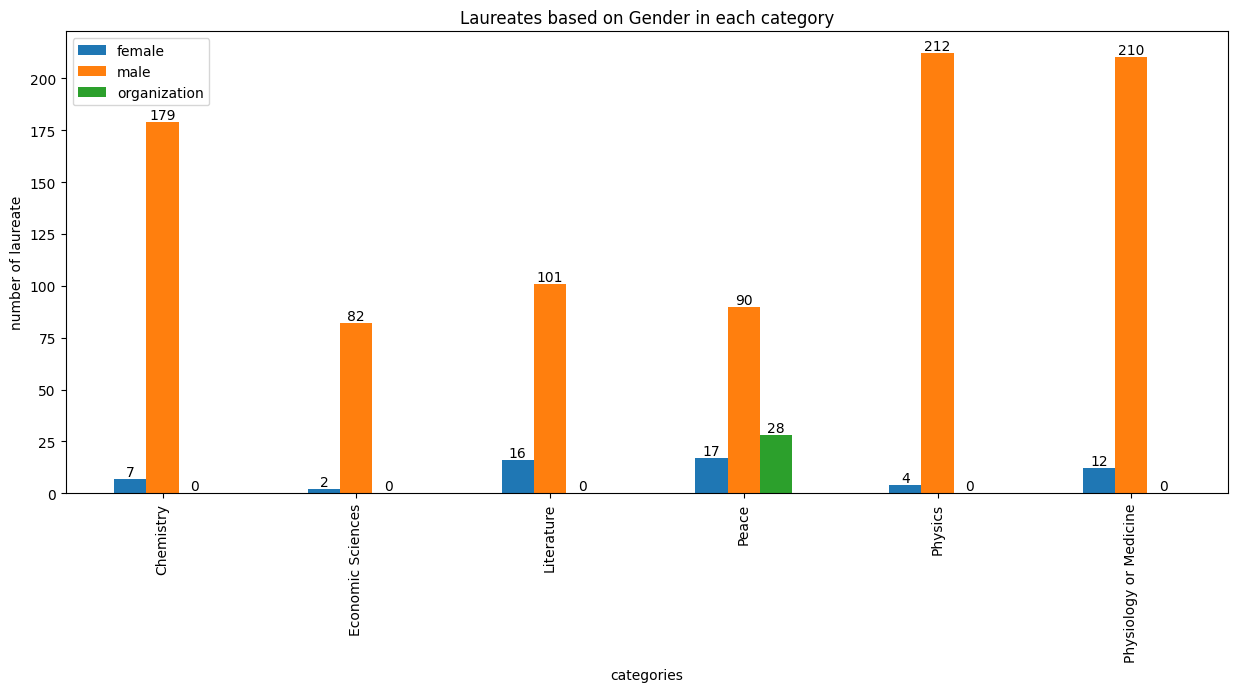

In [54]:
ax=dfgender.pivot(index='category',columns='gender', values='number_of_laureate').plot(kind="bar" , figsize=(15,6))
plt.xlabel('categories')
plt.ylabel('number of laureate')
plt.title('Laureates based on Gender in each category')
plt.legend(loc='upper left')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


## Question2. How many laureates shared this prize with how many people?

In [55]:
df.head()

,award_year,category,share,prize_amount,prize_amount_adjusted,date_awarded,laureate_id,name,gender,birth_date,birth_continent,birth_country,death_date,type
0,2001,Economic Sciences,3,10000000,12295082,10-10-01,745,A. Michael Spence,male,1943-07-11,North America,USA,not dead or organization,Individual
1,1975,Physics,3,630000,3404179,17-10-75,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,08-09-09,Individual
2,2004,Chemistry,3,10000000,11762861,06-10-04,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,not dead or organization,Individual
3,1982,Chemistry,1,1150000,3102518,18-10-82,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,20-11-18,Individual
4,1979,Physics,3,800000,2988048,15-10-79,114,Abdus Salam,male,1926-01-29,Asia,India,21-11-96,Individual


In [56]:
df.share.value_counts()

1      350
2      316
3      216
4       68
1/3      3
1/2      3
1/4      2
1        2
Name: share, dtype: int64

Here we can see that we have some data with 1/2, 1/3,1/4 in share so will convert thwm into 2,3,4 respectively.

In [57]:
df.dtypes

award_year                int64
category                 object
share                    object
prize_amount             object
prize_amount_adjusted    object
date_awarded             object
laureate_id              object
name                     object
gender                   object
birth_date               object
birth_continent          object
birth_country            object
death_date               object
type                     object
dtype: object

In [58]:
df['share'].mask(df['share'] == '1/2', 2, inplace=True)

In [59]:
df['share'].mask(df['share'] == '1/3', 3, inplace=True)

In [60]:
df['share'].mask(df['share'] == '1/4', 4, inplace=True)

In [61]:
df['share'].mask(df['share'] == '1', 1, inplace=True)

In [62]:
df.share.value_counts()

1    352
2    319
3    219
4     70
Name: share, dtype: int64

In [63]:
# coverting series got from value_counts() function into a dataframe.
value_counts=df.share.value_counts()
value_counts

1    352
2    319
3    219
4     70
Name: share, dtype: int64

In [65]:
# 
df_share= value_counts.rename_axis('share').reset_index(name='counts')

In [66]:
df_share

,share,counts
0,1,352
1,2,319
2,3,219
3,4,70


In [67]:
df_share.shape

(4, 2)

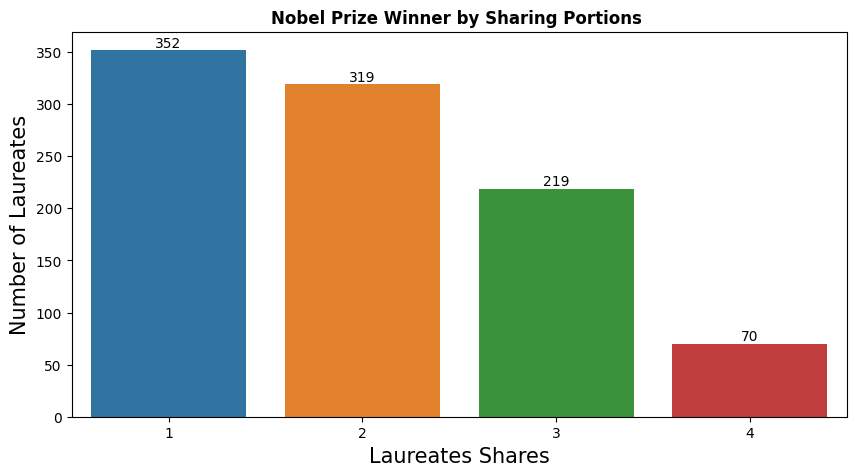

In [68]:
plt.figure(figsize=(10,5))
plt.title('Nobel Prize Winner by Sharing Portions ', fontweight=800)
ax=sns.barplot(y='counts', x='share', orient='v', data=df_share)
plt.ylabel('Number of Laureates', size=15)
plt.xlabel('Laureates Shares', size=15)
for bars in ax.containers:
    ax.bar_label(bars)

Higehest number of Laureates are in single category followed by 2 , 3 , 4 Laureates sharing the prize.

## Question3. Which were first male and female Laureates to get Nobel? 

In [69]:
# using nsmallest() function to get dataframe rows based on award year.

female = df[df.gender == 'female'].nsmallest(1, 'award_year')
male = df[df.gender == 'male'].nsmallest(1, 'award_year')
organization = df[df.gender == 'organization'].nsmallest(1, 'award_year')

In [70]:
female[['name','category','gender']]

,name,category,gender
566,Marie Curie,Physics,female


In [ ]:
So Madam Marie Curie was the first female to get Nobel.

In [71]:
male[['name','category','gender']]

,name,category,gender
211,Emil von Behring,Physiology or Medicine,male


In [72]:
organization[['name','category','gender']]

,name,category,gender
386,Institute of International Law,Peace,organization


In organization category Institute of International Law was first to get Nobel.

## Question4. Which were laureates to get Nobel more than once ?

In [73]:
more_df=df.groupby('name').filter(lambda group: len(group) >= 2)

In [74]:
more_df=more_df.groupby('name')[['laureate_id']].count().reset_index()

In [75]:
more_df.rename(columns = {'laureate_id':'times_got'}, inplace = True)

In [76]:
more_df.sort_values('times_got', ascending=False)

,name,times_got
1,International Committee of the Red Cross,3
0,Frederick Sanger,2
2,John Bardeen,2
3,Linus Pauling,2
4,Marie Curie,2
5,Office of the United Nations High Commissioner...,2


Only International Committee of the Red Cross has got Nobel 3 times otherwise rest every Laureates has got twice. 
Marie Curie is only female in this list.

## Question5. What is the gender composition of the total number of the laureates ? 

In [77]:
df.groupby(['gender'])['gender'].count().reset_index(name='count')

,gender,count
0,female,58
1,male,874
2,organization,28


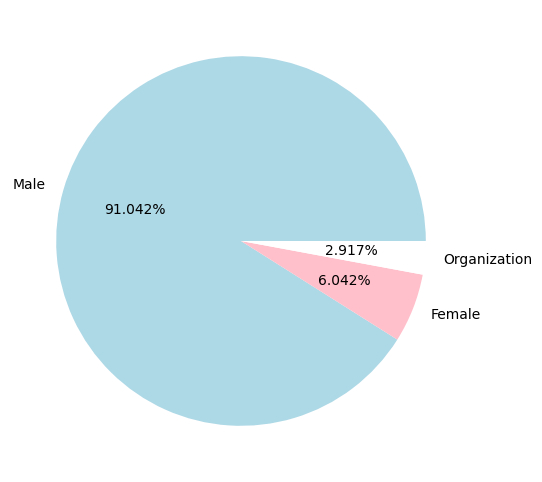

In [78]:
# Plotting the Pie Chart of the above dataframe.
plt.figure(figsize=(6,6))
Female = df['gender'].value_counts()['female']
Male = df['gender'].value_counts()['male']
Organization = df['gender'].value_counts()['organization']
plt.pie([Male, Female, Organization], labels = ['Male', 'Female', 'Organization'], colors=['lightblue','pink','white'], autopct='%1.3f%%', textprops={'size':'10'});

More than 90% of the laureates were males.

## Question6. Who were the youngest laureates ?

In [79]:
df.dtypes

award_year                int64
category                 object
share                    object
prize_amount             object
prize_amount_adjusted    object
date_awarded             object
laureate_id              object
name                     object
gender                   object
birth_date               object
birth_continent          object
birth_country            object
death_date               object
type                     object
dtype: object

In [80]:
df.birth_date=pd.to_datetime(df.birth_date,errors='coerce')

In [81]:
# adding a column birth_year 
df['birth_year'] = df['birth_date'].dt.year

In [82]:
df['age_when_awarded']=df['award_year']-df['birth_year']

In [83]:
youngest_female = df[df.gender == 'female'].nsmallest(1, 'age_when_awarded')
youngest_male = df[df.gender == 'male'].nsmallest(1, 'age_when_awarded')

In [84]:
youngest_female[['name','category','gender','age_when_awarded']]

,name,category,gender,age_when_awarded
562,Malala Yousafzai,Peace,female,17.0


Malala Yousafzai is youngest female nobel laureate.

In [85]:
youngest_male[['name','category','gender','age_when_awarded']]

,name,category,gender,age_when_awarded
526,Lawrence Bragg,Physics,male,25.0


Lawrence Bragg is youngest male nobel laureate.

## Question7. Who were the oldest laureates ?

In [86]:
oldest_female = df[df.gender == 'female'].nlargest(1, 'age_when_awarded')
oldest_male = df[df.gender == 'male'].nlargest(1, 'age_when_awarded')

In [87]:
oldest_female[['name','category','gender','age_when_awarded']]

,name,category,gender,age_when_awarded
177,Doris Lessing,Literature,female,88.0


Doris Lessing is the oldest female nobel laureate.

In [89]:
oldest_male[['name','category','gender','age_when_awarded']]

,name,category,gender,age_when_awarded
456,John B. Goodenough,Chemistry,male,97.0


John B. Goodenough is the oldest male nobel laureate.

# 6. Conclusions

Here conclude the EDA (Exploratory Data Analysis) and Questions part of this  project.

The conclusion from above EDA and Questions sections are:

- EDA:

1) Nobel Prize are given from year 1901 to till date, in which nobel prize are not given to anyone between year 1940 to 1942. It is happen due to world war 2.

2) Nobel Prize are given to 222 laureates in physiology or medicine which is even higher than physics and chemistry.

3) If we talk about countries, USA alone got 287 nobel prizes among the total 960 nobel prizes which more than the one-fourth of the total nobel prizes. It's amazing

4) If we talk about continent, Europe beat North America in terms of nobel laureates which is 513 and 319 respectively. Any other continent barely came near to these two continents.

- Questions:

1) Highest number of female laureates i.e. 17 are in Peace category and lowest i.e. 2  are in Economic Sciences category.

2) There are 350 noble laureate who won the nobel prize alone i.e.,do not share their prize with anyone.

3) Among women Marie Curie is the first women to become a nobel laureate(in physics). Among men Emil Von Behring is the first men to become a nobel laureate(in physiology or medicine). Institute of International Law Peace is the first organization that got a nobel prize(in peace).

4) There are 6 nobel laureate who got nobel prize more than one time. Marie Curie is the only female in the list.

5) In the nobel laureate total female got 58 nobel, male got 574, organization got 28 in which the total percentage share is 6.042%, 91.042% and 2.917% respectively.

6) Malala Yousafzai is youngest Nobel Laureate with only 17 years when she was awarded Nobel Prize.

As mentioned in introduction , Nobel Prize is the most prestigious award a person can get and it is always interesting to do analysis of great minds who get this honour.